In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data = train_data.sort_values('Price').fillna(method='pad')
test_data = test_data.sort_values('DistrictId').fillna(method='pad')

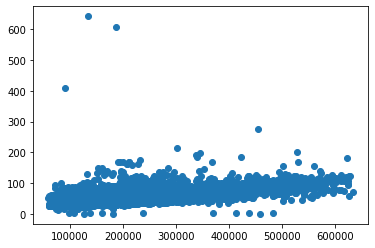

In [4]:
plt.scatter(train_data.Price, train_data.Square)
plt.show()

In [5]:
X_train, X_test = pd.get_dummies(train_data), pd.get_dummies(test_data)
X_train.drop(["Price"], axis=1, inplace=True)
X_train.drop("Id", axis=1, inplace=True)
X_test.drop("Id", axis=1, inplace=True)

In [6]:
y_train = train_data.Price

model = RandomForestRegressor(n_estimators=1442, max_depth=18, random_state=42, max_features=7)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, max_features=7, n_estimators=1442,
                      random_state=42)

In [7]:
test_data["Price"] = model.predict(X_test)
test_data.loc[:, ['Id', 'Price']].to_csv('predictions.csv', index=False)